#Unsupervised Learning - Credit_card dataset

In [ ]:
! unzip '/content/mlpart2.zip'

Archive:  /content/mlpart2.zip
   creating: Machine Learning Question Paper 2 with datasets/
  inflating: Machine Learning Question Paper 2 with datasets/credit_card.csv  
  inflating: Machine Learning Question Paper 2 with datasets/Machine Learning using Python Question Paper 2.pdf  
  inflating: Machine Learning Question Paper 2 with datasets/Sentiment.csv  


Load all necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/Machine Learning Question Paper 2 with datasets/credit_card.csv',sep=',')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#Q1. What does the primary analysis of several categorical features reveal?


Extracting the names of categorical column


In [ ]:
col=df.select_dtypes(include=['object']).columns.tolist()
col

['CUST_ID']

In [ ]:
df.CUST_ID.nunique()

8950

Drop the customer ID column

In [ ]:
df.drop('CUST_ID',axis=1,inplace=True)

In [ ]:
df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#Q2. Exploratory Data Analysis tasks

Checking correlation between variables

<Axes: >

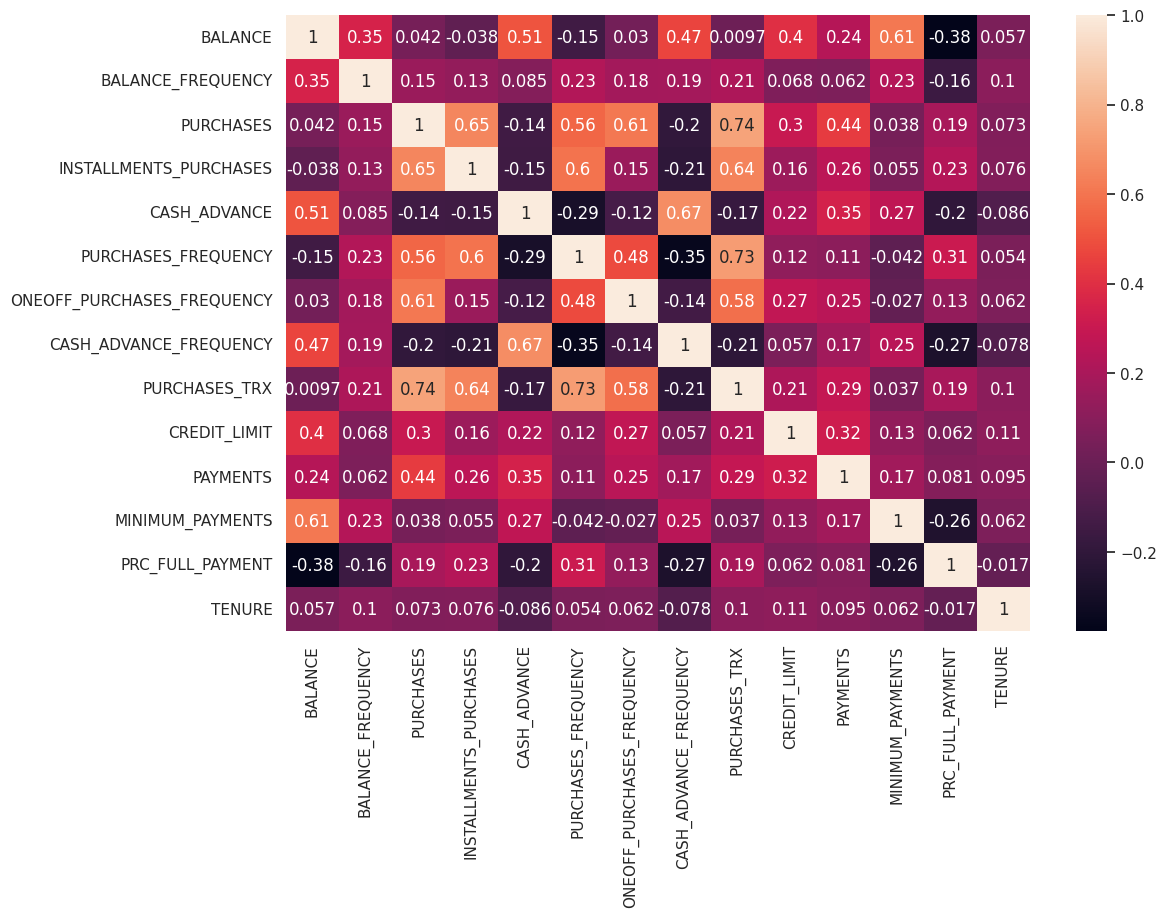

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

2) a. Missing Value Analysis

In [ ]:
df.isnull().sum()


BALANCE                       0
BALANCE_FREQUENCY             0
PURCHASES                     0
INSTALLMENTS_PURCHASES        0
CASH_ADVANCE                  0
PURCHASES_FREQUENCY           0
ONEOFF_PURCHASES_FREQUENCY    0
CASH_ADVANCE_FREQUENCY        0
PURCHASES_TRX                 0
CREDIT_LIMIT                  0
PAYMENTS                      0
MINIMUM_PAYMENTS              0
PRC_FULL_PAYMENT              0
TENURE                        0
dtype: int64

There is some missing values in Credit limit and Minimum payment

<Axes: >

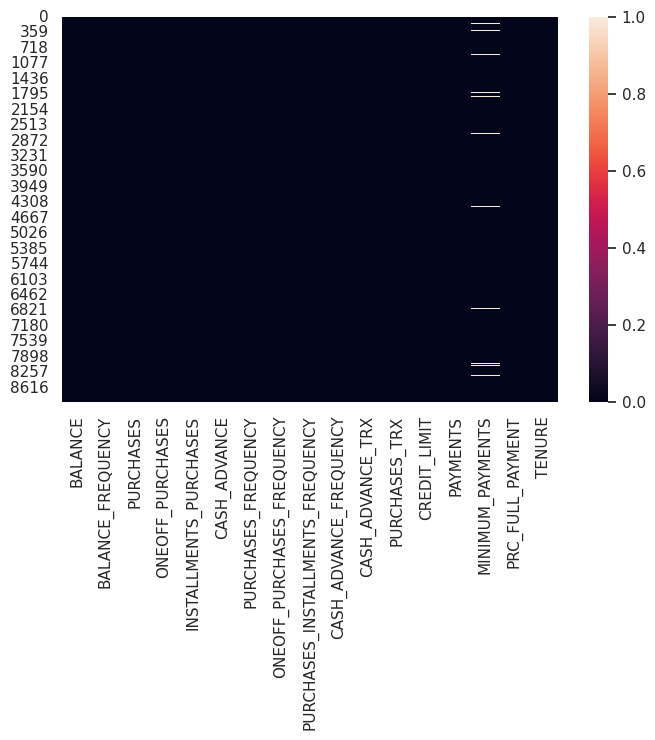

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

Fill the null values using mean values

In [ ]:
df['CREDIT_LIMIT'].fillna(round(df['CREDIT_LIMIT'].mean()),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(round(df['MINIMUM_PAYMENTS'].mean()),inplace=True)
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: >

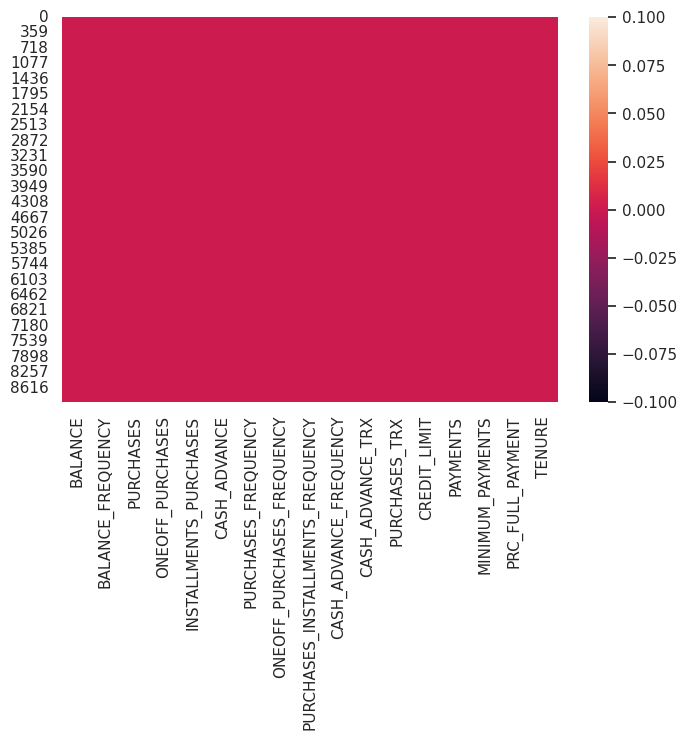

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

2)b.Outlier Treatment using the Z-score method

In [ ]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) <3).all(axis=1)]
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,385.26,0.00,169.554775,0.500000,0.500000,0.000000,0.125000,3,7,500.0,98.225317,113.944625,0.000000,8
8877,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000000,0,7,1000.0,62.619008,109.580539,0.000000,8
8878,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125000,3,0,1200.0,150.755024,337.986933,0.000000,8
8879,137.744895,1.000000,441.00,0.00,441.00,0.000000,0.750000,0.000000,0.625000,0.000000,0,6,1000.0,169.249683,124.639905,0.000000,8


2) c. Dealing with correlated variables

<Axes: >

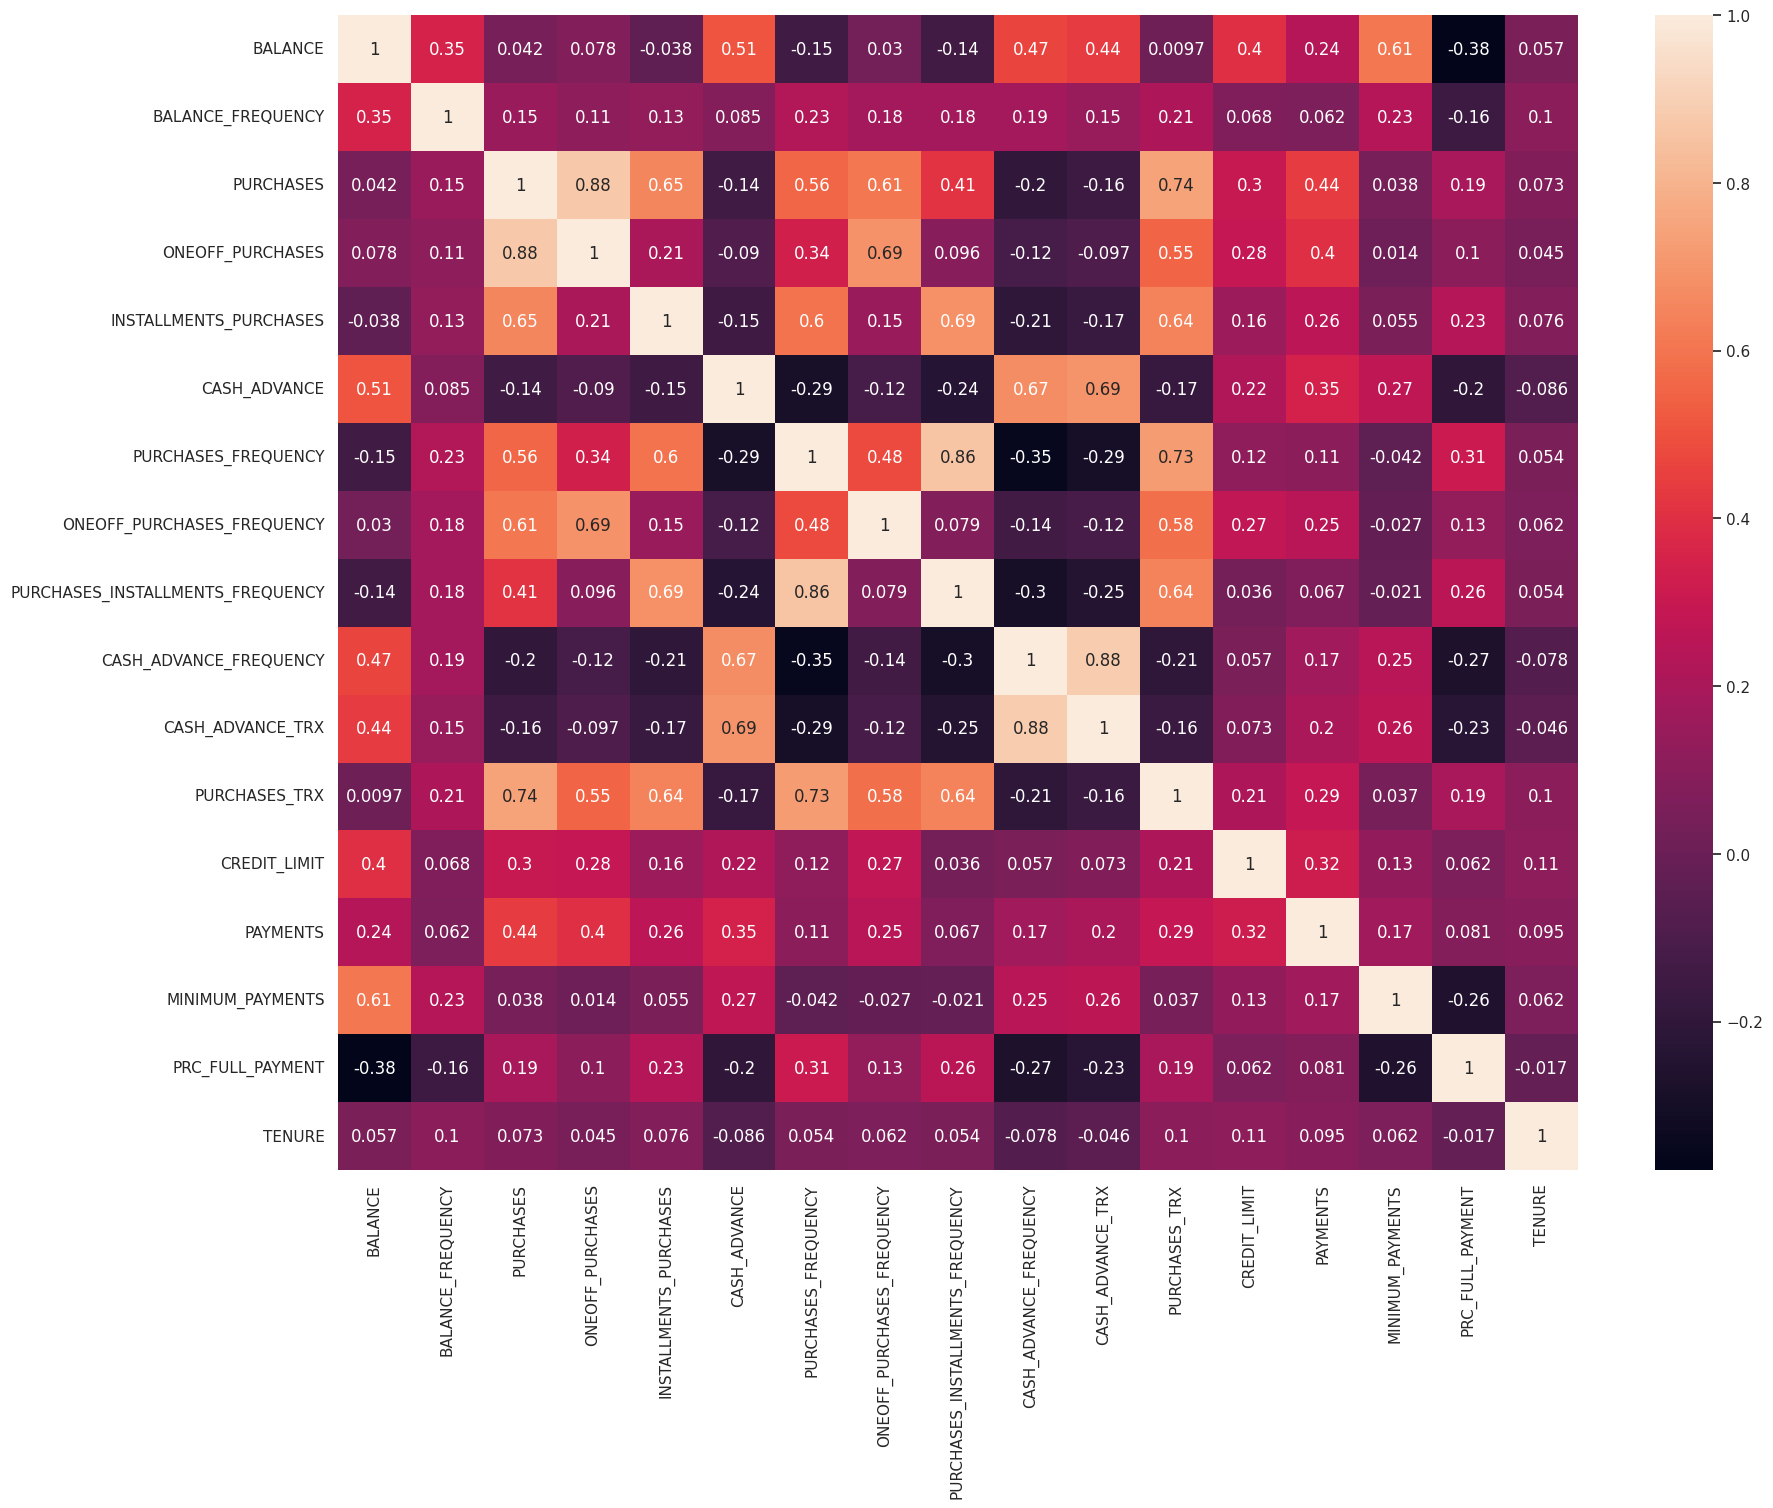

In [ ]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True)

In [ ]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
df = df.drop(columns=to_drop, axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,0.00,169.554775,0.500000,0.500000,0.125000,7,500.0,98.225317,113.944625,0.000000,8
8877,55.147722,0.875000,163.31,163.31,0.000000,0.875000,0.000000,0.000000,7,1000.0,62.619008,109.580539,0.000000,8
8878,869.328293,0.750000,0.00,0.00,1153.925205,0.000000,0.000000,0.125000,0,1200.0,150.755024,337.986933,0.000000,8
8879,137.744895,1.000000,441.00,441.00,0.000000,0.750000,0.000000,0.000000,6,1000.0,169.249683,124.639905,0.000000,8


#Q3. Perform dimensionality reduction using PCA

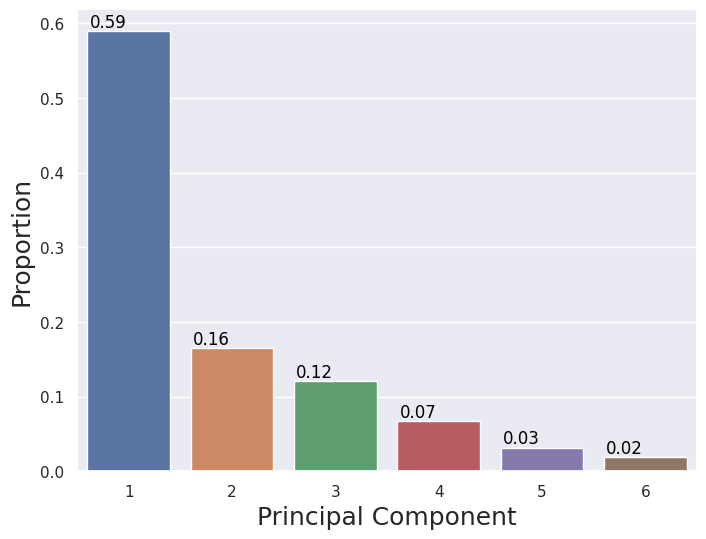

In [ ]:
from sklearn.decomposition import PCA
sk_pca = PCA(n_components=6)
sk_pca.fit(df)
dset2 = pd.DataFrame()
dset2['pca'] = range(1,7)
dset2['vari'] = pd.DataFrame(sk_pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
graph = sns.barplot(x='pca', y='vari', data=dset2)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)
plt.show()

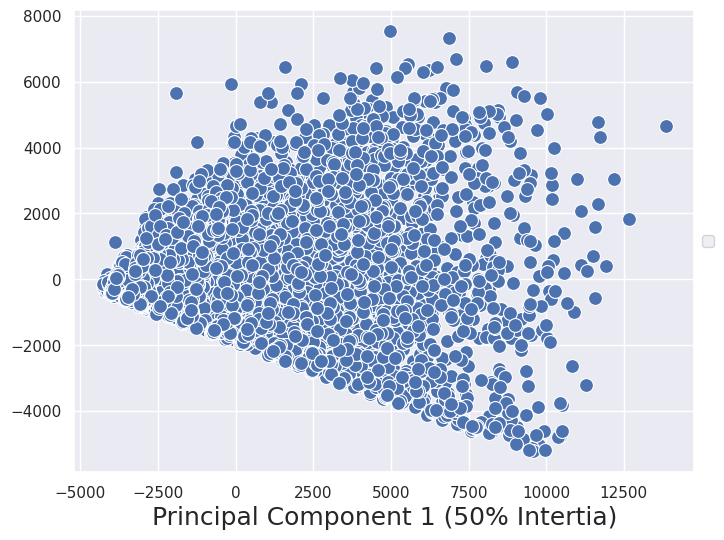

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=x_pca, x=x_pca[:, 0], y=x_pca[:, 1], palette="Set1", legend='full', s=100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Principal Component 1 (50% Intertia)', fontsize=18)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit_transform(df)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,0.00,169.554775,0.500000,0.500000,0.125000,7,500.0,98.225317,113.944625,0.000000,8
8877,55.147722,0.875000,163.31,163.31,0.000000,0.875000,0.000000,0.000000,7,1000.0,62.619008,109.580539,0.000000,8
8878,869.328293,0.750000,0.00,0.00,1153.925205,0.000000,0.000000,0.125000,0,1200.0,150.755024,337.986933,0.000000,8
8879,137.744895,1.000000,441.00,441.00,0.000000,0.750000,0.000000,0.000000,6,1000.0,169.249683,124.639905,0.000000,8


#Q4. K means - Elbow Method

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[2,3,4,5,6,7,8]
for k in n_clusters:
    cluster=KMeans(n_clusters=k , random_state=0)
    predict=cluster.fit_predict(df)

    score=silhouette_score(df , predict , random_state=0)
    print('for n_clusters={} , silhoutte score is {}'.format(k, score))

for n_clusters=2 , silhoutte score is 0.4521131625358664
for n_clusters=3 , silhoutte score is 0.43852974612301515
for n_clusters=4 , silhoutte score is 0.3605501004917412
for n_clusters=5 , silhoutte score is 0.3562657869148566
for n_clusters=6 , silhoutte score is 0.3274258710460645
for n_clusters=7 , silhoutte score is 0.32979793027838405
for n_clusters=8 , silhoutte score is 0.2573315430431648


Elbow Graph

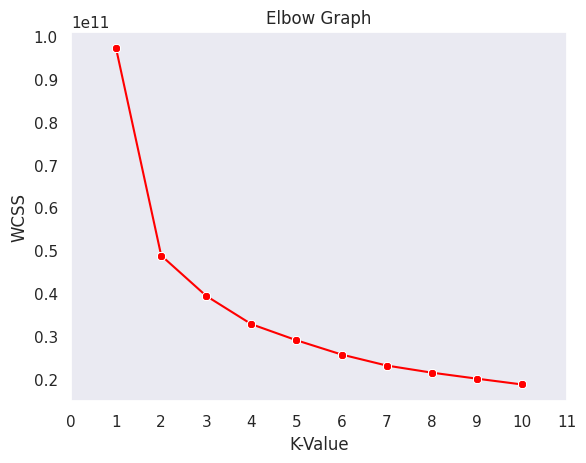

In [ ]:
sns.set(style="darkgrid")
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="random", random_state = 42)
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

#Q5.Finding the optimum value of k

Fit Model

In [ ]:
#built the model for k=4
model = KMeans(n_clusters= 2, random_state=0)
predict=model.fit_predict(df)
score=silhouette_score(df , predict , random_state=0)
print('silhoutte score is {}'.format(score))

silhoutte score is 0.4521131625358664


In [ ]:
data_output = df.copy(deep = True)
data_output['Cluster'] = model.labels_
data_output.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.000000,12,0
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
np.unique(model.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([2308, 5126]))

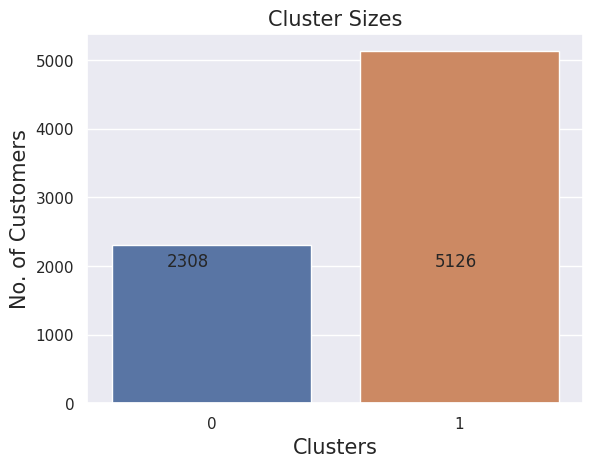

In [ ]:
sns.countplot(data= data_output, x = 'Cluster')
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.show()


# sentiment

Import all libraries

In [ ]:
import numpy as np
import pandas as pd
import math
import re
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/Machine Learning Question Paper 2 with datasets/Sentiment.csv")
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [ ]:
df.shape

(13871, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [ ]:
df["sentiment"].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

#Q1. Total Number of Positive and Negative Sentiment

In [ ]:
p_count = 0
n_count = 0
for i in df["sentiment"]:
    if i == "Positive":
        p_count += 1
    elif i == "Negative":
        n_count += 1
print("Positive count : ", p_count)
print("Negative count : ", n_count)
print("Total positive and negative count : ", p_count + n_count)

Positive count :  2236
Negative count :  8493
Total positive and negative count :  10729


The total number of poitive and negative count is 10729



In [ ]:
df = df[df["sentiment"] != "Neutral"]

#Q2. Sequential LSTM Model

In [ ]:
df_new = df[["sentiment", "text"]]
df_new.head()


,sentiment,text
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,Positive,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,Negative,RT @warriorwoman91: I liked her and was happy ...


Data Preprocessing

In [ ]:
def remove_tags(string):
    removelist = ""
    result = re.sub('RT','',string)
    result = result.lower()
    return result
df_new['text'] = df_new['text'].apply(lambda cw : remove_tags(cw))

<ipython-input-39-6063192e89e0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['text'] = df_new['text'].apply(lambda cw : remove_tags(cw))


In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df_new['text'] = df_new['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-34-45a9a7a9f384>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['text'] = df_new['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [ ]:
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
df_new['text'] = df_new.text.apply(lemmatize_text)
df_new.sample(15)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-35-e5f455d45ff3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['text'] = df_new.text.apply(lemmatize_text)


,sentiment,text
13561,Negative,"@teapainusa: ted cruz speaking, america parent..."
4736,Negative,glad covered #blacklivesmatter &amp; #climatec...
7961,Negative,"chris christie: lip moving, he's still lying h..."
2357,Negative,"#gopdebate very, put politely, macho? people a..."
8480,Negative,tonight learned @govchristie think remove civi...
8955,Negative,@rwsurfergirl: american people pick next presi...
2136,Negative,"following @pattonoswalt last night, #gopdebate..."
11158,Negative,@rwsurfergirl: anyone else want punch chris wa...
6803,Negative,@alexisinnh fox clearly forgot entire issue so...
4933,Negative,"please tell @realdonaldtrump difference ""hones..."


**Encoding  Labels**

In [ ]:
reviews = df_new["text"].values
labels = df_new["sentiment"].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

**Train Test Split**

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

 **Tokenizing senteces**

In [ ]:
vocab_size = 3000
oov_tok = ''
embedding_dim = 100
max_length = 200
padding_type='post'
trunc_type='post'

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)


**Building model**

In [ ]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirection  (None, 128)               84480     
 al)                                                             
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387601 (1.48 MB)
Trainable params: 387601 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 5
history = model.fit(train_padded, train_labels,
                    epochs = num_epochs, verbose = 1,
                    validation_split = 0.1)

Epoch 1/5
227/227 [==============================] - 92s 360ms/step - loss: 0.4126 - accuracy: 0.8315 - val_loss: 0.3355 - val_accuracy: 0.8559
Epoch 2/5
227/227 [==============================] - 61s 271ms/step - loss: 0.2890 - accuracy: 0.8768 - val_loss: 0.3430 - val_accuracy: 0.8571
Epoch 3/5
227/227 [==============================] - 61s 267ms/step - loss: 0.2339 - accuracy: 0.9033 - val_loss: 0.3518 - val_accuracy: 0.8571
Epoch 4/5
227/227 [==============================] - 61s 270ms/step - loss: 0.1931 - accuracy: 0.9205 - val_loss: 0.4365 - val_accuracy: 0.8547
Epoch 5/5
227/227 [==============================] - 60s 264ms/step - loss: 0.1550 - accuracy: 0.9377 - val_loss: 0.4474 - val_accuracy: 0.8472


In [ ]:
prediction = model.predict(test_padded)
pred_labels = []

for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

84/84 [==============================] - 5s 54ms/step
Accuracy of prediction on test set :  0.839731643682445


#Q3. Checking the sentiment for the following two sentences
a. 'He is a great leader.'
b. 'He is a terrible leader.

In [ ]:
sentence = ["He is a great leader.",
            "He is a terrible leader."]

sequences = tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, padding='post', maxlen=max_length)
prediction = model.predict(padded)
pred_labels = []

for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)

for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

1/1 [==============================] - 0s 42ms/step
He is a great leader.
Predicted sentiment :  Positive
He is a terrible leader.
Predicted sentiment :  Negative
